In [2]:
import pandas as pd
import os
from tqdm import tqdm
from random import randint
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt


In [3]:
# Función del grafico de la cantidad de etiquetas del dataset
def grafico(diccionario:dict) -> None:
    datos_ordenados = sorted(diccionario.items(), key=lambda item: item[1], reverse=True)
    etiquetas, alturas = zip(*datos_ordenados)
    plt.bar(etiquetas, alturas, color='skyblue')
    plt.xlabel('Etiquetas')
    plt.ylabel('Cantidad')
    plt.title('Gráfico de Barras')
    plt.xticks(rotation=90)
    plt.show()

In [4]:
# Con el dataframe se crea un diccionario se itera en las etiquetas, se agrega la cantidad y porcentaje 
# de cada etiqueta en el diccionario y al final se muestran los valores
def ver_categorias(data:pd.DataFrame) -> None:
  diccionario = {}
  for categoria in data['label'].unique():
    cantidad = data["label"][data["label"]==categoria].count()
    porcentaje = round(cantidad/len(data)*100,2)
    diccionario[categoria] = cantidad
    print(f'\n\nCategoría: {categoria}     Cantidad: {cantidad}    Porcentaje: {porcentaje}%')
  print('\n')
  print(diccionario)
  print('\n\n')
  grafico(diccionario)
  print('\n\n\n\n')

In [5]:
# porcentaje de cada categoria para mostrar en el grafico
def porcentaje_categorias(data:pd.DataFrame) -> dict:
  porcentaje_categorias = {}
  for categoria in data['label'].unique():
    cantidad = data["label"][data["label"]==categoria].count()
    porcentaje = round(cantidad/len(data)*100,2)
    porcentaje_categorias[categoria] = porcentaje
  return porcentaje_categorias

In [6]:
# se crea una lista con todos los datasets para concatenarlos en uno solo
DATASET_DIRECTORY = 'datasets/dataset_originales/'
df_sets = [k for k in os.listdir(DATASET_DIRECTORY) if k.endswith('.csv')]
len(df_sets)

50

In [7]:
# De cada dataset se calcula la etiqueta que tiene menos porcentaje de valores
def cantidad_minima(data:pd.DataFrame) -> int:
  lista = []
  for etiqueta in data['label'].unique():
    lista.append(data['label'][data['label']==etiqueta].count())
  return min(lista)


In [8]:
df = pd.DataFrame()

In [9]:
# Función para concatenar todos los datasets
def dataset_binario(archivo:str, data:pd.DataFrame) -> pd.DataFrame:
  df_original = pd.read_csv(DATASET_DIRECTORY + archivo)# se carga un dataset
  etiquetas = list(df_original['label'].unique())
  etiquetas.remove('BenignTraffic')
  cantidad = cantidad_minima(df_original)
  cantidad_benigno = len(df_original[df_original['label']=='BenignTraffic'])//900 # se llego a 900 despues de hacer pruebas para ver como quedaban balanceados los datos
  for etiqueta in etiquetas:
    data = pd.concat([data, df_original[df_original['label']== etiqueta].sample(cantidad)])
    data = pd.concat([data, df_original[df_original['label']=='BenignTraffic'].sample(cantidad_benigno)])
  return data

In [10]:
ver_categorias(df)

KeyError: 'label'

In [ ]:
# se iteran toda la lista de archivos para concatenar todos los archivos
for archivo in tqdm(df_sets):
  df = dataset_binario(archivo, df)
df.shape

100%|██████████| 50/50 [04:32<00:00,  5.45s/it]


(29964, 47)

In [11]:
df_prueba = pd.read_csv('datasets/dataset_originales/part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')



Categoría: DDoS-PSHACK_Flood     Cantidad: 22155    Porcentaje: 8.81%


Categoría: DoS-UDP_Flood     Cantidad: 17851    Porcentaje: 7.1%


Categoría: DoS-TCP_Flood     Cantidad: 14375    Porcentaje: 5.72%


Categoría: Mirai-udpplain     Cantidad: 4846    Porcentaje: 1.93%


Categoría: DDoS-UDP_Flood     Cantidad: 29075    Porcentaje: 11.57%


Categoría: DDoS-ICMP_Flood     Cantidad: 39236    Porcentaje: 15.61%


Categoría: DDoS-RSTFINFlood     Cantidad: 21781    Porcentaje: 8.66%


Categoría: DDoS-TCP_Flood     Cantidad: 24266    Porcentaje: 9.65%


Categoría: DDoS-SynonymousIP_Flood     Cantidad: 19101    Porcentaje: 7.6%


Categoría: Mirai-greip_flood     Cantidad: 3987    Porcentaje: 1.59%


Categoría: DoS-SYN_Flood     Cantidad: 10780    Porcentaje: 4.29%


Categoría: DDoS-SYN_Flood     Cantidad: 21650    Porcentaje: 8.61%


Categoría: Mirai-greeth_flood     Cantidad: 5343    Porcentaje: 2.13%


Categoría: BenignTraffic     Cantidad: 5992    Porcentaje: 2.38%


Categoría: MITM-Ar

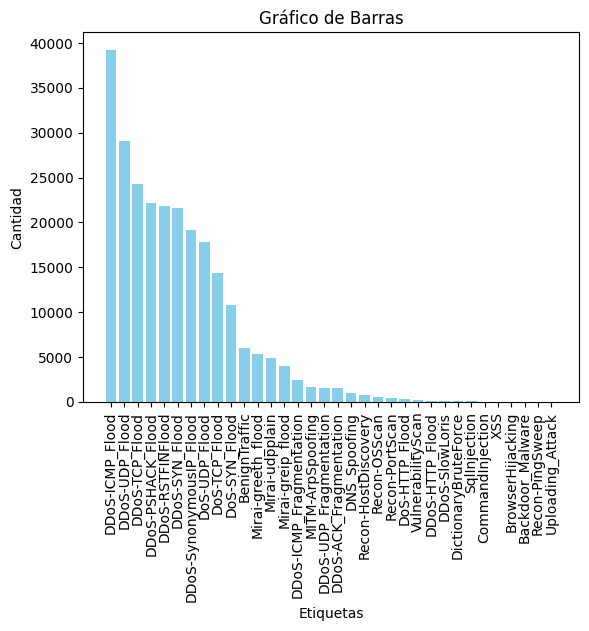

In [12]:
ver_categorias(df_prueba)

In [ ]:
# Se asigna el valor de 'malware' a las categorias que no son benigno
df['label'][df['label']!='BenignTraffic'] = 'malware'

In [ ]:
df['label'].unique()

array(['malware', 'BenignTraffic'], dtype=object)

In [ ]:
df.sample(10)

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
67061,19.192480,1708958.50,7.10,215.20,82.082122,82.082122,0.0,0.0,0.0,0.0,...,817.216527,67.30,1.665176e+08,13.5,30.472391,1157.980110,6.737134e+05,1.00,244.60,BenignTraffic
133720,59.236197,1933231.40,7.10,99.40,51.549592,51.549592,0.0,0.0,0.0,0.0,...,1196.955466,1406.20,1.665251e+08,13.5,38.293753,1695.880058,1.478149e+06,1.00,244.60,BenignTraffic
45700,4.392549,750277.00,6.00,232.00,147.180682,147.180682,0.0,0.0,0.0,0.0,...,3.975963,66.00,1.665184e+08,13.5,11.395227,5.634970,1.599328e+01,1.00,244.60,BenignTraffic
53141,182.399167,47029.50,8.20,99.50,3.786263,3.786263,0.0,0.0,0.0,0.0,...,42.925689,107.60,4.960489e-02,5.5,15.054899,60.706091,2.088233e+03,0.90,38.50,malware
30069,2645.364467,5324.40,5.90,67.70,0.227069,0.227069,0.0,0.0,0.0,0.0,...,53.357741,115.80,1.664391e+08,13.5,14.041897,75.653588,2.872244e+03,1.00,244.60,malware
220924,0.320425,3387.40,6.00,179.60,31.066251,31.066251,0.0,0.0,0.0,0.0,...,840.906372,650.00,6.642485e-03,5.5,31.450126,1189.221195,1.015877e+06,0.70,38.50,BenignTraffic
155906,24.532806,1095304.80,7.10,234.40,73.197499,73.197499,0.0,0.0,0.0,0.0,...,774.085271,77.70,1.665193e+08,13.5,30.598690,1096.781989,6.041224e+05,1.00,244.60,BenignTraffic
354966,350.952769,35758.20,14.80,70.40,1.821904,1.821904,0.0,0.0,0.0,0.0,...,53.939124,56.00,1.665174e+08,13.5,12.814948,76.438916,2.933321e+03,1.00,244.60,BenignTraffic
77066,134.360241,2090.60,6.50,101.40,2998.210622,2998.210622,0.0,0.0,0.0,0.0,...,59.981316,87.90,1.189959e-02,5.5,14.747920,84.826391,4.161062e+03,0.90,38.50,malware
116543,69.570534,5658.74,7.21,90.75,5.436640,5.436640,0.0,0.0,0.0,0.0,...,316.452473,171.22,8.300290e+07,9.5,19.222086,447.824226,3.782780e+05,0.95,141.55,malware




Categoría: malware     Cantidad: 15510    Porcentaje: 51.76%


Categoría: BenignTraffic     Cantidad: 14454    Porcentaje: 48.24%


{'malware': 15510, 'BenignTraffic': 14454}





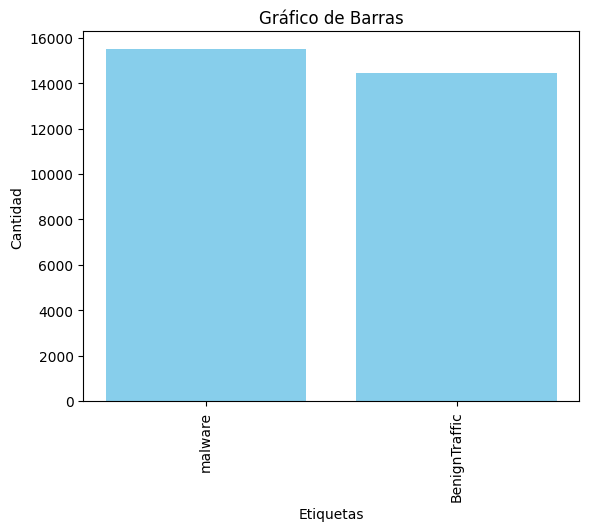

In [ ]:
# se visualiza el porcentaje de cada categoria de la etiqueta objetivo
ver_categorias(df)

In [ ]:
df.to_parquet('datasets/datasets_entrenamieto/Dataset_binario.parquet', index=False)